In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller, acf, pacf
import statsmodels.api as sm

In [ ]:
def get_test_real_data(sequence):

    data_real = pd.read_csv("/remote-home/21310019/2024/pv_TSTR/TS/data_folder/ori_pv_start_from_0101.csv",usecols=["PV/kwh"]).values
    data_real_ = data_real[9408:,:].reshape(-1,24)
    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range
    #data_real_ = normalization(data_real)
    #data_real_ = data_real_[9408:,:].reshape(-1,24)

    #class_label = data_npz["arr_1"]
    daily_slice = []
    daily_length_list = []
    daily_length_count = []

    for i in range(data_real_.shape[0]):
        daily = data_real_[i,:]
        sub_slice = []
        for j in range(24):
            if daily[j] != 0:
                daily_length_count.append(j)
                sub_slice.append(daily[j])
        daily_length_list.append(len(sub_slice)) 
        daily_slice.append(sub_slice)  

    #print(len(daily_slice))####416  
    pv_drop0 = None
    for i in range(len(daily_slice)):
        fea = np.array(daily_slice[i])
        if pv_drop0 is None:
            pv_drop0 = fea
        else:
            pv_drop0 = np.concatenate([pv_drop0,fea],axis=0)

    X = []
    Y = []
    for i in range(pv_drop0.shape[0] - sequence):
        X.append(pv_drop0[i:(i + sequence)])##[4,1]
        Y.append(pv_drop0[i + sequence])##1
    print(np.array(X).shape)

    max_value = {}
    min_value = {}

    # 构建batch
    testx_pre = np.array(X)
    testx = normalization(testx_pre)
    
    max_value["testx"] = np.max(testx_pre)
    min_value["testx"] = np.min(testx_pre)

    testy_pre = np.array(Y)
    testy = normalization(testy_pre)
    max_value["testy"] = np.max(testy_pre)
    min_value["testy"] = np.min(testy_pre)

    #return testx_pre,testy_pre
    return testx,testy

def get_train_real_data(sequence):

    data_real = pd.read_csv("/remote-home/21310019/2024/pv_TSTR/TS/data_folder/ori_pv_start_from_0101.csv",usecols=["PV/kwh"]).values
    ori_data_ = data_real[:8616,:].reshape(-1,24)
    #class_label = data_npz["arr_1"]
    daily_slice = []
    daily_length_list = []
    daily_length_count = []

    for i in range(ori_data_.shape[0]):
        daily = ori_data_[i,:]
        sub_slice = []
        for j in range(24):
            if daily[j] != 0:
                daily_length_count.append(j)
                sub_slice.append(daily[j])
        daily_length_list.append(len(sub_slice)) 
        daily_slice.append(sub_slice)  

    #print(len(daily_slice))####416  
    pv_drop0 = None
    for i in range(len(daily_slice)):
        fea = np.array(daily_slice[i])
        if pv_drop0 is None:
            pv_drop0 = fea
        else:
            pv_drop0 = np.concatenate([pv_drop0,fea],axis=0)

    X = []
    Y = []
    for i in range(pv_drop0.shape[0] - sequence):
        X.append(pv_drop0[i:(i + sequence)])##[4,1]
        Y.append(pv_drop0[i + sequence])##1
    print(np.array(X).shape)

    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range

    max_value = {}
    min_value = {}

    # 构建batch
    total_len = len(Y)
    train_len = int(0.9*total_len)
    test_len = total_len-train_len
    
    trainx_pre = np.array(X)
    trainx = normalization(trainx_pre)
    
    max_value["trainx"] = np.max(trainx_pre)
    min_value["trainx"] = np.min(trainx_pre)
    
    trainy_pre = np.array(Y)
    trainy = normalization(trainy_pre)

    max_value["trainy"] = np.max(trainy_pre)
    min_value["trainy"] = np.min(trainy_pre)

    return trainx, trainy

def get_fake_data(data_path,sequence):
    
    data_npz = np.load(
            data_path)
    data_real = pd.read_csv("/remote-home/21310019/2024/pv_TSTR/TS/data_folder/ori_pv_start_from_0101.csv",usecols=["PV/kwh"]).values
    
    ori_data = data_npz["arr_0"].reshape(-1,24)
    data_real_ = np.concatenate([data_real[:8616,:],data_real[9408:,:]],axis = 0).reshape(-1,24)
    ori_data_ = np.concatenate([data_real_,ori_data],axis = 0)
    #class_label = data_npz["arr_1"]
    daily_slice = []
    daily_length_list = []
    daily_length_count = []

    for i in range(ori_data_.shape[0]):
        daily = ori_data_[i,:]
        sub_slice = []
        for j in range(24):
            if daily[j] != 0:
                daily_length_count.append(j)
                sub_slice.append(daily[j])
        daily_length_list.append(len(sub_slice)) 
        daily_slice.append(sub_slice)  

    #print(len(daily_slice))####416  
    pv_drop0 = None
    for i in range(len(daily_slice)):
        fea = np.array(daily_slice[i])
        if pv_drop0 is None:
            pv_drop0 = fea
        else:
            pv_drop0 = np.concatenate([pv_drop0,fea],axis=0)

    X = []
    Y = []
    for i in range(pv_drop0.shape[0] - sequence):
        X.append(pv_drop0[i:(i + sequence)])##[4,1]
        Y.append(pv_drop0[i + sequence])##1
    print(np.array(X).shape)

    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range

    max_value = {}
    min_value = {}

    # 构建batch
    total_len = len(Y)
    train_len = int(0.9*total_len)
    test_len = total_len-train_len
    
    trainx_pre = np.array(X[:int(0.9 * total_len)])
    trainx = normalization(trainx_pre)
    
    max_value["trainx"] = np.max(trainx_pre)
    min_value["trainx"] = np.min(trainx_pre)
    
    trainy_pre = np.array(Y[:int(0.9 * total_len)])
    trainy = normalization(trainy_pre)

    max_value["trainy"] = np.max(trainy_pre)
    min_value["trainy"] = np.min(trainy_pre)
     
    testx_pre = np.array(X[int(0.9 * total_len):])
    testx = normalization(testx_pre)
    
    max_value["testx"] = np.max(testx_pre)
    min_value["testx"] = np.min(testx_pre)

    testy_pre = np.array(Y[int(0.9 * total_len):])
    testy = normalization(testy_pre)
    max_value["testy"] = np.max(testy_pre)
    min_value["testy"] = np.min(testy_pre)


    return trainx, trainy,testx,testy

In [15]:
def get_train_set():
    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range
    data_real = pd.read_csv("/remote-home/21310019/2024/pv_TSTR/TS/data_folder/ori_pv_start_from_0101.csv",usecols=["PV/kwh"]).values
    ori_data_ = data_real[:8616,:].reshape(-1,24)
    #class_label = data_npz["arr_1"]
    daily_slice = []
    daily_length_list = []
    daily_length_count = []

    for i in range(ori_data_.shape[0]):
        daily = ori_data_[i,:]
        sub_slice = []
        for j in range(24):
            if daily[j] != 0:
                daily_length_count.append(j)
                sub_slice.append(daily[j])
        daily_length_list.append(len(sub_slice)) 
        daily_slice.append(sub_slice)  

    #print(len(daily_slice))####416  
    pv_drop0 = None
    for i in range(len(daily_slice)):
        fea = np.array(daily_slice[i])
        if pv_drop0 is None:
            pv_drop0 = fea
        else:
            pv_drop0 = np.concatenate([pv_drop0,fea],axis=0)
    print("len(train_data):",pv_drop0.shape)
    return normalization(pv_drop0)

In [16]:
def get_test_set():
    data_real = pd.read_csv("/remote-home/21310019/2024/pv_TSTR/TS/data_folder/ori_pv_start_from_0101.csv",usecols=["PV/kwh"]).values
    data_real_ = data_real[9408:,:].reshape(-1,24)
    def normalization(data):
        _range = np.max(data) - np.min(data)
        return (data - np.min(data)) / _range
    
    daily_slice = []
    daily_length_list = []
    daily_length_count = []

    for i in range(data_real_.shape[0]):
        daily = data_real_[i,:]
        sub_slice = []
        for j in range(24):
            if daily[j] != 0:
                daily_length_count.append(j)
                sub_slice.append(daily[j])
        daily_length_list.append(len(sub_slice)) 
        daily_slice.append(sub_slice)  

    #print(len(daily_slice))####416  
    pv_drop0 = None
    for i in range(len(daily_slice)):
        fea = np.array(daily_slice[i])
        if pv_drop0 is None:
            pv_drop0 = fea
        else:
            pv_drop0 = np.concatenate([pv_drop0,fea],axis=0)
    
    print("len(test_data):",pv_drop0.shape)
    return normalization(pv_drop0)


In [17]:
train_data = get_train_set()
test_data = get_test_set()

len(train_data): (4665,)
len(test_data): (683,)


In [18]:
def get_p_q(data_real):
    # 检查是否平稳
    result_adf = adfuller(data_real)
    print('ADF Statistic:', result_adf[0])
    print('p-value:', result_adf[1])##如果p-value < 0.05, 拒绝原假设，时间序列是平稳的

    #绘制差分后的ACF和PACF图
    fig, axes = plt.subplots(1, 2, figsize=(16, 4))
    sm.graphics.tsa.plot_acf(data_real, lags=40, ax=axes[0])##根据pacf确定MA的阶数，即q
    sm.graphics.tsa.plot_pacf(data_real, lags=40, ax=axes[1])##根据pacf确定AR的阶数，即p
    plt.show()

ADF Statistic: -7.298694660292179
p-value: 1.3564702866809166e-10


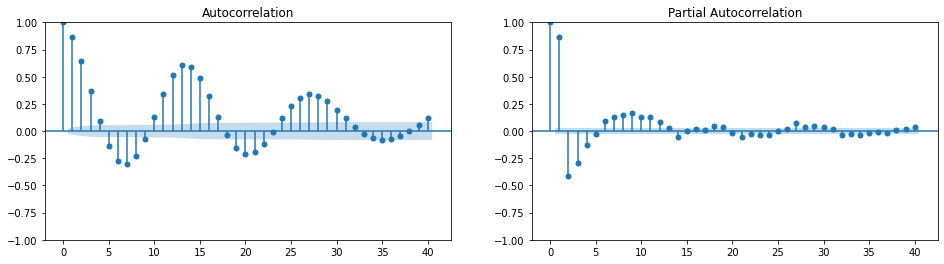

In [19]:
get_p_q(train_data)

In [23]:
def fit_eva_sarimax(train,test):
    # 定义和拟合ARIMA模型
    p = 1  # 从PACF图中确定
    d = 0 # 通过差分确定
    q = 1 # 从ACF图中确定
    seasonal_period = 4
    P=1
    D=0
    Q=1

    # 定义SARIMAX模型的参数
    order = (p, d, q)  # ARIMA部分的参数 (p, d, q)
    seasonal_order = (P, D, Q, seasonal_period)  # 季节性部分的参数 (P, D, Q, s)，其中s是季节周期
    # 拟合SARIMAX模型
    
    model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
    results = model.fit(disp=False)
    # 输出模型摘要
    print(results.summary())
    
    # 预测
    n_forecast = len(test)
    forecast = results.get_forecast(steps=n_forecast)
    forecast_index = test.index

    # 获取预测结果和置信区间
    forecast_values = forecast.predicted_mean
    conf_int = forecast.conf_int()

    # 创建预测结果的DataFrame
    forecast_df = pd.DataFrame({
        'forecast': forecast_values,
        'lower_ci': conf_int.iloc[:, 0],
        'upper_ci': conf_int.iloc[:, 1]
    }, index=forecast_index)

    from sklearn.metrics import mean_squared_error, mean_absolute_error

    # 计算评估指标
    mse = mean_squared_error(test, forecast_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test, forecast_values)
    mape = np.mean(np.abs((test - forecast_values) / test)) * 100

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}%')

    '''
    plt.figure(figsize=(12, 6))
    plt.plot(train, label='Training Data')
    plt.plot(test, label='Test Data')
    plt.plot(forecast_df['forecast'], label='Forecast', color='red')
    plt.fill_between(forecast_df.index, forecast_df['lower_ci'], forecast_df['upper_ci'], color='pink', alpha=0.3)
    plt.legend()
    plt.title('SARIMAX Model Forecast')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()
    '''
fit_eva_sarimax(train=pd.DataFrame(train_data),test=pd.DataFrame(test_data))

                                     SARIMAX Results                                     
Dep. Variable:                                 0   No. Observations:                 4665
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 4)   Log Likelihood                4507.154
Date:                           Sat, 29 Jun 2024   AIC                          -9004.308
Time:                                   08:40:41   BIC                          -8972.069
Sample:                                        0   HQIC                         -8992.969
                                          - 4665                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9333      0.005    177.395      0.000       0.923       0.944
ma.L1          0.2288      0.009     25.655